#### Exploratory data analysis of variables

In [2]:
# import relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import os

In [3]:
# import the cleaned dataset
tracks_df = pd.read_parquet('tracks_df.parquet', engine='fastparquet')

In [4]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Columns: 150 entries, track_id to world_music
dtypes: Int64(7), boolean(119), float64(18), object(6)
memory usage: 42.2+ MB


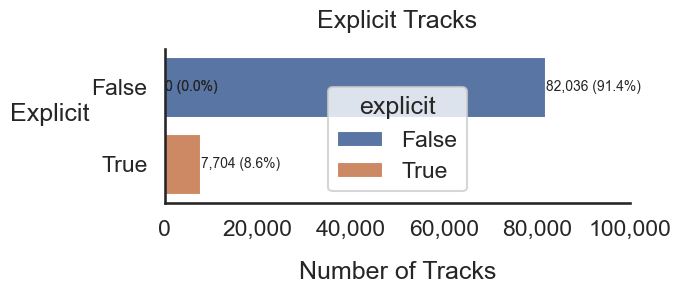

In [15]:
sns.set_style("white") 
plt.figure(figsize = (6,2))
ax = sns.countplot(data = tracks_df, y= 'explicit', width = 0.8, hue = 'explicit')
total = len(tracks_df)

xlim = ax.get_xlim()[1]  # current x-axis upper limit

for p in ax.patches:
    count = int(p.get_width())
    proportion = count / total
    label = f'{count:,} ({proportion:.1%})'
    
    # Check if label would go past the axis
    if p.get_width() + 0.5 > xlim:
        # Place label inside bar
        ax.text(
            x=p.get_width() - 0.5,
            y=p.get_y() + p.get_height()/2,
            s=label,
            ha='right',
            va='center',
            color='white',
            fontsize=10
        )
    else:
        # Place label outside bar
        ax.text(
            x=p.get_width() + 0.5,
            y=p.get_y() + p.get_height()/2,
            s=label,
            ha='left',
            va='center',
            fontsize=10
        )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)




#plt.title('Explicit tracks')
ax.set_title('Explicit Tracks', pad = 15)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#plt.xlabel('Number of Tracks')
ax.set_xlabel('Number of Tracks', labelpad = 15)
ax.set_xlim(0,100000)

ax.set_ylabel('Explicit', labelpad = 30, rotation = 0) 


#plt.tight_layout()
plt.show()

In [5]:
tracks_df.head()

,track_id,artists,album_name,track_name,artist_alnum,album_alnum,track_alnum,popularity,explicit,key,...,spanish,study,swedish,synth_pop,tango,techno,trance,trip_hop,turkish,world_music
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,True,True,True,44,True,8,...,False,False,False,False,False,False,False,False,False,False
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,True,True,True,47,False,0,...,False,False,False,False,False,False,False,False,False,False
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,True,True,True,22,False,5,...,False,False,False,False,False,False,False,False,False,False
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,True,True,True,62,False,0,...,False,False,False,False,False,False,False,False,False,False
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,True,True,True,19,False,6,...,False,False,False,False,False,False,False,False,False,False


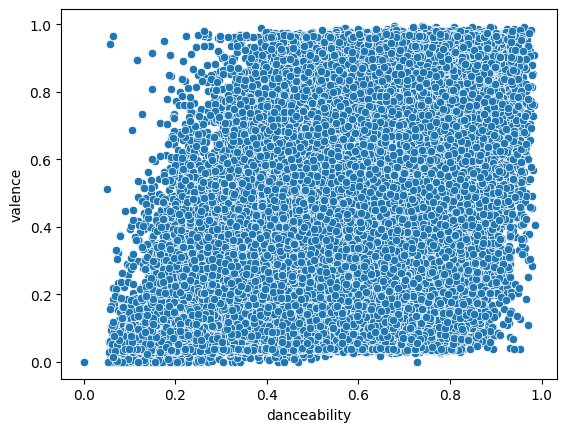

In [6]:
sns.scatterplot(data = tracks_df, x = 'danceability', y = 'valence')
plt.show()